<a href="https://colab.research.google.com/github/saahilgupta93/awesome-collection-of-google-colab-notebooks/blob/master/Copy_of_PixelLink.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scene Text Detection with PixelLink

This notebook uses [PixelLink](https://github.com/ZJULearning/pixel_link) to detect text areas on a given image.

For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).


## Install PixelLink

In [0]:
import os
from os.path import exists, join, basename, splitext, abspath

git_repo_url = 'https://github.com/ZJULearning/pixel_link.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install
  !git clone -q $git_repo_url
  # make opencv3 compatible
  !sed -i 's/cv2.cv.BoxPoints/cv2.boxPoints/' $project_name/pixel_link.py
  # save output to output.png
  !sed -i 's/print util.sit(image_data)/print util.sit(image_data, format="bgr", path="\/content\/output.png")/' $project_name/test_pixel_link_on_any_image.py
  # submodule doesn't work, checkout manually
  !cd $project_name && rm -rf pylib && git clone -q https://github.com/dengdan/pylib.git && cd pylib && git checkout e749559
  os.environ['PYTHONPATH'] += ':' + join(abspath(project_name), 'pylib/src')
  #!cd $project_name && pip install -q -r requirements.txt
  
import sys
sys.path.append(project_name)
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

Note: checking out 'e749559'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at e749559 fix a bug in do_nothing


## Download pretrained model

In [0]:
def download_from_google_drive(file_id, file_name):
  # download a file from the Google Drive link
  !rm -f ./cookie
  !curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=$file_id" > /dev/null
  confirm_text = !awk '/download/ {print $NF}' ./cookie
  confirm_text = confirm_text[0]
  !curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=$confirm_text&id=$file_id" -o $file_name
  
pretrained_model = 'conv3_3'
if not exists(pretrained_model):
  # download the pretrained model
  pretrained_model_file_name = 'pixel_link_vgg_4s.zip'
  download_from_google_drive('19mlX5W8OBalSjhf5oTTS6qEq2eAU8Tg9', pretrained_model_file_name)
  !unzip $pretrained_model_file_name

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0   2639      0 --:--:-- --:--:-- --:--:--  2639
100  218M    0  218M    0     0  70.7M      0 --:--:--  0:00:03 --:--:--  100M
Archive:  pixel_link_vgg_4s.zip
   creating: conv3_3/
  inflating: conv3_3/checkpoint      
  inflating: conv3_3/config.py       
  inflating: conv3_3/model.ckpt-38055.data-00000-of-00001  
  inflating: conv3_3/model.ckpt-38055.meta  
  inflating: conv3_3/model.ckpt-38055.index  


## Detect scene text on a test image

First, dowload a test image from internet:

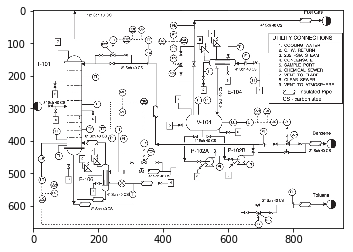

In [0]:
#IMAGE_URL = 'https://raw.githubusercontent.com/tugstugi/dl-colab-notebooks/master/resources/billboard.jpg'
IMAGE_URL = 'https://camo.githubusercontent.com/1fcb61cdf20b0a751043247ae9ff0518018759c7/687474703a2f2f7074676d656469612e70656172736f6e636d672e636f6d2f696d616765732f63686170315f393738303133323631383132302f656c656d656e744c696e6b732f303166696730375f616c742e6a7067'

image_file_name = basename(IMAGE_URL)
download_dir = '/content/images'
!mkdir -p $download_dir && rm -rf $download_dir/*
!wget -q -P $download_dir $IMAGE_URL
  

plt.imshow(matplotlib.image.imread(join(download_dir, image_file_name)))

Run PixelLink on the above test image:

In [0]:
!cd $project_name && ./scripts/test_any.sh 0 ../conv3_3/model.ckpt-38055 $download_dir

++ set -e
++ export CUDA_VISIBLE_DEVICES=0
++ CUDA_VISIBLE_DEVICES=0
++ python test_pixel_link_on_any_image.py --checkpoint_path=../conv3_3/model.ckpt-38055 --dataset_dir=/content/images --eval_image_width=1280 --eval_image_height=768 --pixel_conf_threshold=0.5 --link_conf_threshold=0.5 --gpu_memory_fraction=-1
/usr/local/lib/python2.7/dist-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/pixel_link/pixel_link_decode.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
Instructions for updating:
Please switch to tf.train.get_or_create_global_step
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, use
    tf.py_function, which takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to 

Now, visualize the result:

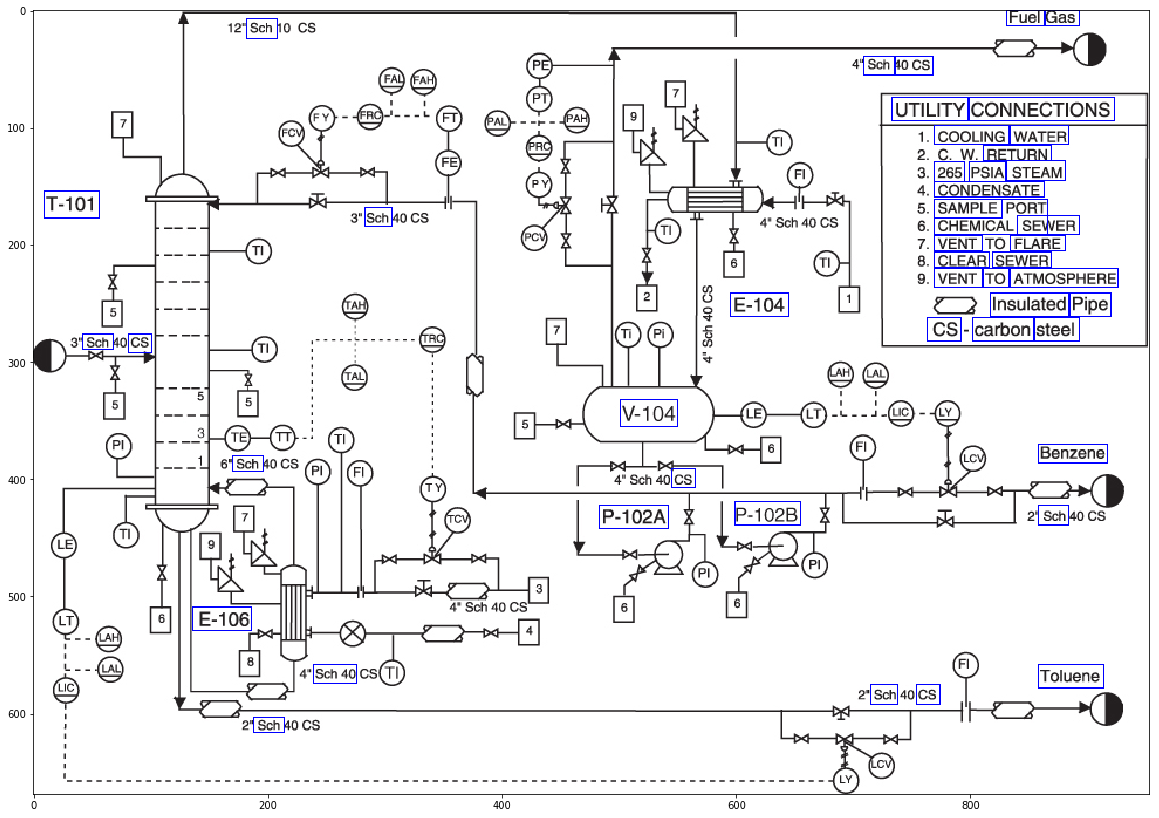

In [0]:
plt.figure(figsize=(20, 26))
plt.imshow(matplotlib.image.imread('output.png'))